In [ ]:
####
#Title: Stock_Model_LSTM
#Author: Guo Zebin

#Description: This is stock prediction model using ML models
#             Use LSTM and multiple features
#Evaluation: Using MSE, no feature scaling.
#Conclusion: LSTM performs far more better than lr and tree
#Discussion: 1. parameter adjustment? 2. does these features reasonable as training data?

In [ ]:
#Import all the library used
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

In [ ]:
#load the data from local environment
from google.colab import files
uploaded = files.upload()

Saving netflix.csv to netflix.csv


In [ ]:
#store the data into df
df = pd.read_csv('netflix.csv')
df.tail(1000)

,Date,High,Low,Open,Close,Volume,Adj Close
3881,2017-10-20,196.380005,193.770004,195.899994,194.160004,5995600.0,194.160004
3882,2017-10-23,194.899994,191.029999,194.169998,192.470001,6980000.0,192.470001
3883,2017-10-24,196.740005,191.399994,192.750000,196.020004,7069100.0,196.020004
3884,2017-10-25,197.059998,193.009995,195.380005,193.770004,5315300.0,193.770004
3885,2017-10-26,197.610001,194.080002,194.660004,195.210007,5185800.0,195.210007
...,...,...,...,...,...,...,...
4876,2021-10-05,640.390015,606.890015,606.940002,634.809998,9534300.0,634.809998
4877,2021-10-06,639.869995,626.359985,628.179993,639.099976,4580400.0,639.099976
4878,2021-10-07,646.840027,630.450012,642.229980,631.849976,3556900.0,631.849976
4879,2021-10-08,643.799988,630.859985,634.169983,632.659973,3271100.0,632.659973


In [ ]:
# get the size of data
df.shape

(4881, 7)

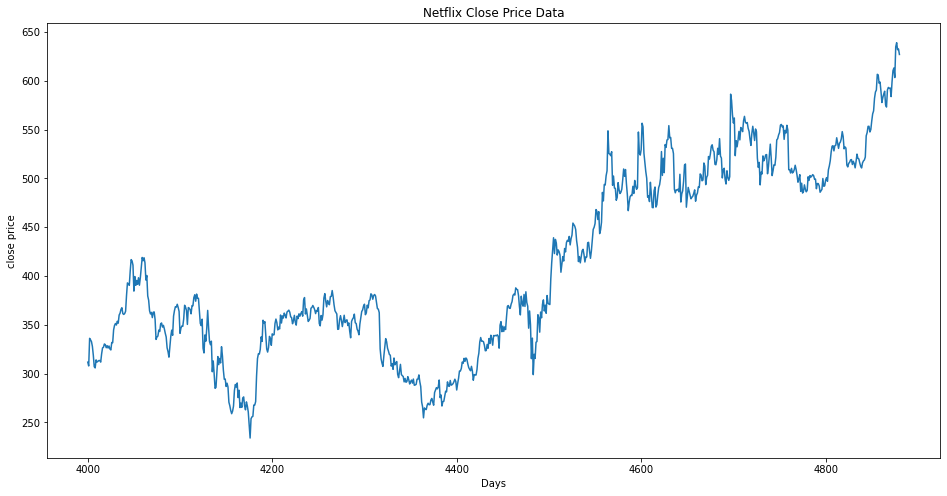

In [ ]:
#visualise the close price data
plt.figure(figsize=(16,8))
plt.title('Netflix Close Price Data')
plt.xlabel('Days')
plt.ylabel('close price')
plt.plot(df['Close'][4000:])
plt.show()

In [ ]:
# Drop out the useless data
df = df.drop(['Date','Adj Close'],1)

In [ ]:
# Implement the feature scaling
scaler = MinMaxScaler()
df = scaler.fit_transform(df)
random.shuffle(df)
df

array([[0.0014696 , 0.00144506, 0.00138506, 0.00146226, 0.32341447],
       [0.0014696 , 0.00144506, 0.00138506, 0.00146226, 0.32341447],
       [0.00145067, 0.00146573, 0.00148671, 0.00139251, 0.01957055],
       ...,
       [0.006359  , 0.0064505 , 0.00629121, 0.00633859, 0.0144472 ],
       [0.00675509, 0.00672169, 0.0066343 , 0.00682812, 0.08370666],
       [0.00345765, 0.00351129, 0.00341944, 0.00348254, 0.01162665]])

In [ ]:
# Stretch out the training and testing data
X = df[:,[0,1,2,4]]
y = df[:,[3]]

In [ ]:
y.shape

(4881, 1)

In [ ]:
X_train = []
y_train = []
X_test = []
y_test = []

In [ ]:
# Create training set
for i in range(60, (int)(X.shape[0] * 0.8)):
  X_train.append(X[i-60:i])
  y_train.append(y[i-1])

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
y_train.shape

(3844, 1)

In [ ]:
# Create testing set
for i in range((int)(X.shape[0] * 0.8)+60, X.shape[0]):
  X_test.append(X[i-60:i])
  y_test.append(y[i-1])

In [ ]:
X_test, y_test = np.array(X_test), np.array(y_test)
y_test.shape

(917, 1)

In [ ]:
# create LSTM model(figure out what each parameters are doing IMPORTANT!)
model = Sequential()

model.add(LSTM(units = 50, activation='relu', return_sequences = True, input_shape = (X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation='relu', return_sequences = True))
model.add(Dropout(0.2))
model.add(LSTM(units = 60, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 60, 50)            11000     
                                                                 
 dropout_9 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_10 (LSTM)              (None, 60, 60)            26640     
                                                                 
 dropout_10 (Dropout)        (None, 60, 60)            0         
                                                                 
 lstm_11 (LSTM)              (None, 60)                29040     
                                                                 
 dropout_11 (Dropout)        (None, 60)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [ ]:
#Now do the trainging(this is one of the judgement of parameter adjustment)
model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(X_train,y_train,epochs = 20,batch_size = 32)

Epoch 1/20
121/121 [==============================] - 15s 96ms/step - loss: 9.4550e-05
Epoch 2/20
121/121 [==============================] - 12s 97ms/step - loss: 9.3956e-05
Epoch 3/20
121/121 [==============================] - 12s 97ms/step - loss: 9.2312e-05
Epoch 4/20
121/121 [==============================] - 12s 96ms/step - loss: 9.1704e-05
Epoch 5/20
121/121 [==============================] - 11s 95ms/step - loss: 9.1274e-05
Epoch 6/20
121/121 [==============================] - 12s 96ms/step - loss: 9.1527e-05
Epoch 7/20
121/121 [==============================] - 12s 95ms/step - loss: 9.0250e-05
Epoch 8/20
121/121 [==============================] - 12s 96ms/step - loss: 8.9422e-05
Epoch 9/20
121/121 [==============================] - 12s 95ms/step - loss: 8.9799e-05
Epoch 10/20
121/121 [==============================] - 12s 96ms/step - loss: 9.0941e-05
Epoch 11/20
121/121 [==============================] - 12s 97ms/step - loss: 8.8517e-05
Epoch 12/20
121/121 [====================

In [ ]:
# Do the prediction
y_predict = model.predict(X_test)
y_test.shape

(917, 1)

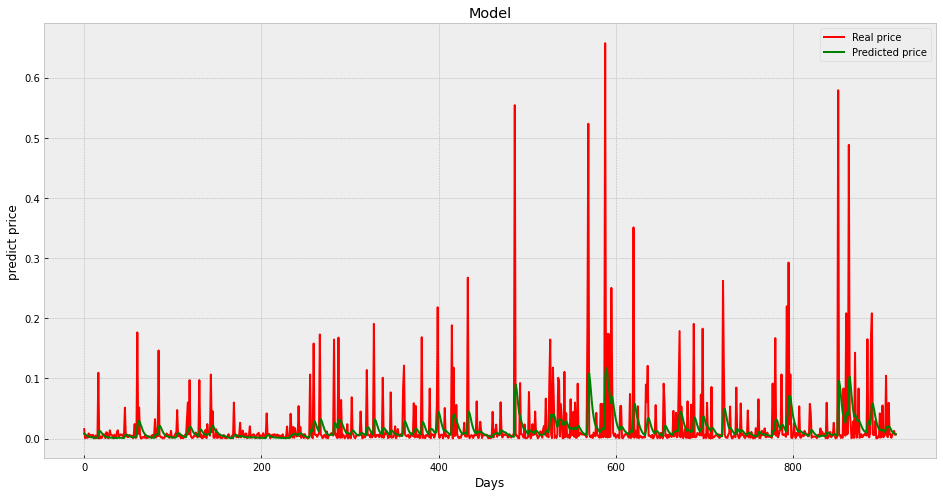

In [ ]:
##visualise the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('predict price')
plt.plot(y_test, color = 'red', label = 'Real price')
plt.plot(y_predict, color = 'green', label = 'Predicted price')
plt.legend()
plt.style.use('bmh')
plt.show()

In [ ]:
print('MSE:')
print(mean_squared_error(y_test, y_predict))

MSE:
0.0026856240932585885
